# Amazon kindle store Reviews

Description:

Amazon Kindle Store is an e-book e-commerce store for all the book reading hobbyists. Online reviews are a category of product information created by the users based on personal handling experience. Online shopping websites endow with platforms for consumers to review products and carve up opinions. Sentiment analysis or opinion mining is nothing but classification of emotions in the reviews text into positive, negative and neutral. Opinion mining is a method of information extraction from text processing to improve or develop the business work by review analysis. The problem is most of the comments from customer reviews about the products are contradicted to their ratings. Many customer will post their comments and forgot to rate the product or not engrossed to rate it. In this work we have designed a classifier model which accepts all the reviews and group them into two categories as reviews with ratings and reviews with blank or empty ratings. Further prediction of sentiments using various classifiers is done for the reviews without ratings.


In [2]:
import os
os.getcwd()

'C:\\Users\\gopia\\Desktop\\internship project\\codes'

In [3]:
os.chdir(r"C:\Users\gopia\Desktop\internship project\Data set")

In [4]:
os.getcwd()

'C:\\Users\\gopia\\Desktop\\internship project\\Data set'

# Importing the libraries

In [5]:
import numpy as np #import numerical data
import pandas as pd #contains manipulate function
import matplotlib.pyplot as plt #matplotlib. pyplot is a collection of command style functions that make matplotlib work like MATLAB. Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc.



# Importing the dataset 

The dataset is available in two forms

1.csv file

2.SQLite Database

In order to load the data, We have used the SQLITE dataset as it easier to query the data and visualise the data efficiently.

Here as we only want to get the global sentiment of the recommendations (positive or negative), we will purposefully ignore all Scores equal to 3. If the score id above 3, then the recommendation wil be set to "positive". Otherwise, it will be set to "negative".



In [50]:
data1=pd.read_csv("kindle_reviews.csv") #the data in the csv file is stored in data1
data1

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,B000F83SZQ,"[0, 0]",5,I enjoy vintage books and movies so I enjoyed ...,"05 5, 2014",A1F6404F1VG29J,Avidreader,Nice vintage story,1399248000
1,1,B000F83SZQ,"[2, 2]",4,This book is a reissue of an old one; the auth...,"01 6, 2014",AN0N05A9LIJEQ,critters,Different...,1388966400
2,2,B000F83SZQ,"[2, 2]",4,This was a fairly interesting read. It had ol...,"04 4, 2014",A795DMNCJILA6,dot,Oldie,1396569600
3,3,B000F83SZQ,"[1, 1]",5,I'd never read any of the Amy Brewster mysteri...,"02 19, 2014",A1FV0SX13TWVXQ,"Elaine H. Turley ""Montana Songbird""",I really liked it.,1392768000
4,4,B000F83SZQ,"[0, 1]",4,"If you like period pieces - clothing, lingo, y...","03 19, 2014",A3SPTOKDG7WBLN,Father Dowling Fan,Period Mystery,1395187200
...,...,...,...,...,...,...,...,...,...,...
15157,15157,B003CT31VQ,"[1, 1]",5,thrilling story with a great lineup of charact...,"05 29, 2013",A1393Z698SVLTP,Roy Henson,could not put my kindle down!,1369785600
15158,15158,B003CT31VQ,"[1, 1]",5,Daveny loves landscaping and is excited to be ...,"05 17, 2010",A2YXNKWOGHP6AW,Sandy,Forgiveness comes to Collin...,1274054400
15159,15159,B003CT31VQ,"[0, 0]",4,"A wonderfully, sweet Christian romance that in...","12 15, 2013",A8UGU796JGMJU,Shannon Sonneveldt,Sweet Christian Romance,1387065600
15160,15160,B003CT31VQ,"[1, 1]",4,Colin's traumatic experience and soul struggle...,"04 11, 2014",A1GQEH3S58URDX,Sunshine,Heart Warming,1397174400


# Exploratory Data Analysis (EDA)

In [51]:
data1.groupby('overall')['summary'].describe()

,count,unique,top,freq
overall,,,,
1,675,639,Boring,7
2,899,857,Disappointing,5
3,2134,1935,Good,15
4,4521,3870,Good,42
5,6933,5704,Loved it,35


In [52]:
data1.groupby('overall').overall.count()

overall
1     675
2     899
3    2134
4    4521
5    6933
Name: overall, dtype: int64

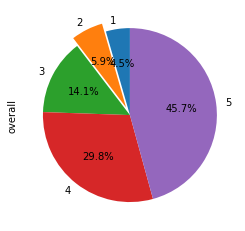

In [53]:
%matplotlib inline
data1.groupby('overall').overall.count().plot(kind='pie',autopct='%1.1f%%',startangle=90,explode=(0,0.1,0,0,0),)

# Text Cleaning or Pre-processing 

Now that we have finished deduplication our data requires some preprocessing before we go on further with analysis and making the prediction model.
1.Begin by removing the html tags

2.Remove any punctuations or limited set of special characters like , or . or # etc.

3.Check if the word is made up of english letters and is not alpha-numeric

4.Check to see if the length of the word is greater than 2 (as it was researched that there is no adjective in 2-letters)

4.Convert the word to lowercase

6.Remove Stopwords


Finally Snowball Stemming the word (it was obsereved to be better than Porter Stemming)


In [54]:
# Import libraries
import re  #“Re” is the library which is used to replace the selected special characters with desired parameter.
import nltk #“NLTK” – Natural language Tool Kit is the library used for stemming using a special class in the library. 

# import library for remove Stopwords

In [55]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gopia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [56]:
from nltk.corpus import stopwords

# import library for stemming

In [57]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
data=[]

# Remove Punctuation,Numbers
# Convert each word into its lower case
# Stemming

Stemming is the process of producing morphological variants of a root/base word. Stemming programs are commonly referred to as stemming algorithms or stemmers. To stem each word first we have to split the review in to a list and then apply stemming functionality. we use port stemmer class for stemming purpose. We are also removing stop words like “this”, “that”, “and”, “is”, “what” etc. The syntax checks all the words in the list which is split, if the word is not a stop word then you are applying stemming to stem the selected word” 

In [74]:
for i in range(0,15162):
    review = data1["reviewText"][i]
    review = re.sub('[^a-zA-Z]', ' ', review)
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    data.append(review)

In [75]:
data[:10]

['enjoy vintag book movi enjoy read book plot unusu think kill someon self defens leav scene bodi without notifi polic hit someon jaw knock would wash today still good read',
 'book reissu old one author born era say nero wolf introduct quit interest explain author forgotten never heard languag littl date time like call gun heater also made good use fire dictionari look word like deshabil canarsi still well worth look see',
 'fairli interest read old style terminolog glad get read stori coars crasslanguag read fun relax like free ebooksbecaus check writer decid intrigu innov enough command englishthat convey stori without crude languag',
 'never read ami brewster mysteri one realli hook',
 'like period piec cloth lingo enjoy mysteri author guess least way',
 'beauti depth charact descript make like fast pace movi piti mr merwin write instead ami brewster mysteri',
 'enjoy one tho sure call ami brewster mysteri much clean well written charact well drawn',
 'never heard ami brewster need

# split the data set into train and test

In [93]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [104]:
Y = data1['summary'].values
X = data1['reviewText'].values
print(Y.shape)
print(type(Y))
print(X.shape)
print(type(X))

(15162,)
<class 'numpy.ndarray'>
(15162,)
<class 'numpy.ndarray'>


In [105]:
# split the data set into train and test
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X,Y,test_size=0.3, random_state=12, shuffle = False)

# split the train data set into cross validation train and cross validation test
X_tr, X_cv, Y_tr, Y_cv = train_test_split(X,Y, test_size=0.3, random_state=12, shuffle = False)

print('='*100)
print("After splitting")
print("X_Train Shape:",X_Train.shape, "Y_Train Shape:",Y_Train.shape)
print("X_cv Shape:",X_cv.shape,       "Y_cv Shape",Y_cv.shape)
print("X_Test Shape",X_Test.shape,    "Y_Test Shape",Y_Test.shape)

After splitting
X_Train Shape: (10613,) Y_Train Shape: (10613,)
X_cv Shape: (4549,) Y_cv Shape (4549,)
X_Test Shape (4549,) Y_Test Shape (4549,)


# Model Building

After splitting your data into train and test in pre-processing steps then you should implement ANN algorithm The steps are as follows  
 Importing the libraries 

 Initializing the model 

 Adding input layer

 Adding Hidden 

 Adding output layer

 Configuring the learning process  

 Training the model

 Saving the model

 Predictions 

 

# Importing the libraries

import librart which usess tensor flow as backend

In [106]:
import keras

Using TensorFlow backend.
C:\Users\gopia\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\gopia\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\gopia\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\gopia\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

Library to intialise the model

In [107]:
from keras.models import Sequential

Library Used to add the model

In [108]:
from keras.layers import Dense

# Initializing the model 

Model initialization is the process of determining the necessary model parameters such as the basic value, the trend value, and the seasonal indices for the selected forecast model. It is necessary when you use a model that forecasts a value for one period based on the forecast value for the period directly before it.


In [109]:
model = Sequential()